In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
trainDf = pd.read_csv("train.csv")
testDf = pd.read_csv("test.csv")
print(trainDf.shape)
print(testDf.shape)

(1460, 81)
(1459, 80)


In [3]:
combDf = trainDf.append(testDf, ignore_index=True)
# combDf.sample(10)
print(combDf.columns)

Index(['id', 'label', 'tweet'], dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [4]:
combDf["tweet"] = combDf["tweet"].str.lower()
combDf.sample(5)

,id,label,tweet
5698,5699,0.0,@user &lt;3 &lt;3 listen to my most beautiful ...
33698,33699,NaN,#bihday your majesty from us all at @user
21431,21432,0.0,my king #love #bf #shopping #lunch #rugbyday #...
5525,5526,0.0,me and my #sister ð i don't know what i wou...
22971,22972,0.0,so here it is. summer project #youthpreprofess...


In [5]:
def remove_pat(s1, pat, nstr):
    return re.sub(pat, nstr, s1)
combDf["new_tweet"] = np.vectorize(remove_pat)(combDf["tweet"], "@[\w]*", "")
combDf.sample(5)

,id,label,tweet,new_tweet
2322,2323,0.0,#safe #flight #esy â¢â¢â¢ @user on his way ...,#safe #flight #esy â¢â¢â¢ on his way to #c...
33881,33882,NaN,#aym audio cd cover on the way... 2 more days ...,#aym audio cd cover on the way... 2 more days ...
20912,20913,1.0,17 crazy things women couldn't do in 1960 #co...,17 crazy things women couldn't do in 1960 #co...
15210,15211,0.0,@user need some ? of course you do! stream t...,need some ? of course you do! stream this a...
43870,43871,NaN,look who visited qma today??!! #theopen @use...,look who visited qma today??!! #theopen


In [6]:
combDf["new_tweet"] = np.vectorize(remove_pat)(combDf["new_tweet"], "[^a-zA-Z#_]+", " ")
combDf.sample(5)

,id,label,tweet,new_tweet
41169,41170,NaN,@user it's time for the #yesawards winner ann...,it s time for the #yesawards winner announcem...
6325,6326,0.0,"happy to have new @user book, lil upset some t...",happy to have new book lil upset some the page...
21338,21339,0.0,#caturday everyone! ð»ðð¾ #cute #cats...,#caturday everyone #cute #cats #kitten #catso...
28876,28877,0.0,"sta your day on a #cute, note by setting a ""...",sta your day on a #cute note by setting a cudd...
4104,4105,0.0,ð do you want to meet me?? -,do you want to meet me


In [7]:
def m1(s1, pat):
    return " ".join(re.findall(pat, s1))
combDf["hash"] = np.vectorize(m1)(combDf["new_tweet"], r"#(\w+)")
combDf["new_tweet"] = np.vectorize(remove_pat)(combDf["new_tweet"], r"#[a-z]+", "")
combDf.sample(5)

,id,label,tweet,new_tweet,hash
12338,12339,0.0,@user @user congrats you idiot just committed ...,congrats you idiot just committed ridda you c...,
31443,31444,1.0,@user is a &amp; a sick fuck! he looks like h...,is a amp a sick fuck he looks like his pedoph...,
29903,29904,0.0,8 days to go! #aneveningwithcyrus #eatscottish...,days to go,aneveningwithcyrus eatscottish sponsorship
18703,18704,0.0,warriors happy to conve new skeptics: oaklan...,warriors happy to conve new skeptics oakland ...,
23103,23104,0.0,"@user #ineedtoconsult bro t, i have lot of un...",bro t i have lot of un answered questions ab...,ineedtoconsult


In [8]:
# print(re.sub(r"(?<!#)\b[a-z]{1,3}\b", "",  "kk #kk ok kkkkkk "))
#              

In [9]:
combDf["new_tweet"] = np.vectorize(remove_pat)(combDf["new_tweet"], r"\b[a-z]{1,2}\b", " ")
combDf.sample(10)

,id,label,tweet,new_tweet,hash
22103,22104,0.0,@user the angst this must be causing: 'i want ...,the angst this must causing want yap ab...,
12172,12173,0.0,ive just repurposed this former mustard jar in...,ive just repurposed this former mustard jar in...,recycle moremustard
13279,13280,0.0,swimming time ðâï¸ðð #swimi#swimmi...,swimming time,swimi swimming sea sun sunny beach
26299,26300,0.0,#euro2016 stas tonightâ½ï¸ð¤â½ï¸ #irl,stas tonight,euro irl
8119,8120,0.0,new account new sta new me. #fresh #healthy ...,new account new sta new,fresh healthy fit toned fighter stronger movin...
16629,16630,0.0,@user #coldplaywembley with @user @user !,with,coldplaywembley
19954,19955,0.0,when this comes up as breaking news. poor bast...,when this comes breaking news poor bastard...,unfriend wtf
23722,23723,1.0,#itstheendoftheworldand #us #msm has yet to ho...,has yet honestly expose the deep rooted h...,itstheendoftheworldand us msm barrackobama trump
1950,1951,0.0,you get the street cred for tackling half the ...,you get the street cred for tackling half the ...,
45385,45386,NaN,@user hola entrega! i am happy now. #flower ...,hola entrega happy now lamp,flower acrilic design likesforlikes


In [10]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in combDf['new_tweet']])

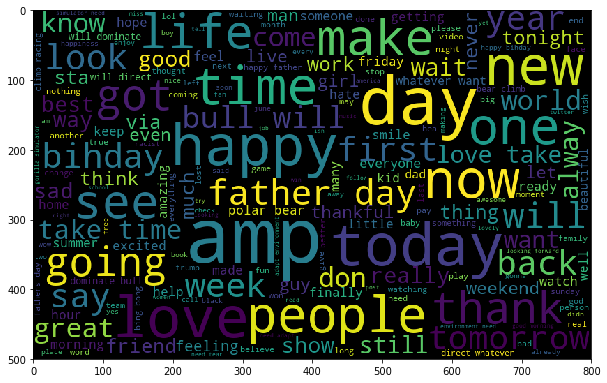

In [11]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.show()

In [12]:
import matplotlib.pyplot as plt
df2 = combDf['new_tweet'][combDf["label"]==1]
all_words = ' '.join([text for text in df2])

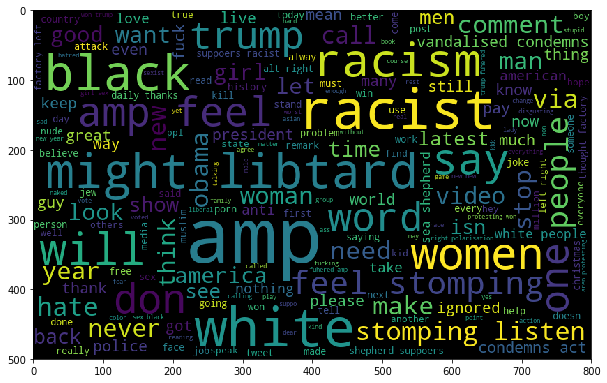

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.show()

In [14]:
import matplotlib.pyplot as plt
df2 = combDf['new_tweet'][combDf["label"]==0]
all_words = ' '.join([text for text in df2])

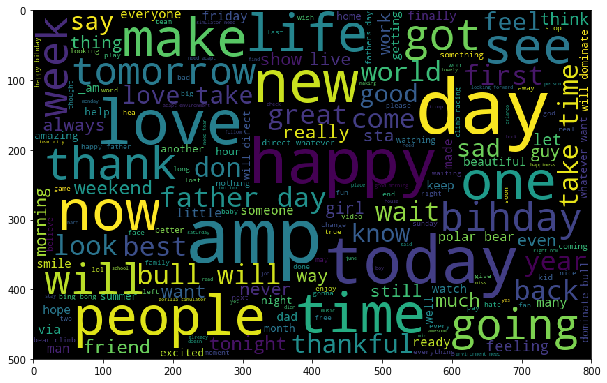

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.show()

In [16]:
import matplotlib.pyplot as plt
df2 = combDf['new_tweet'][combDf["label"]==1]
all_words = ' '.join([text for text in df2])
df2 = combDf['hash'][combDf["label"]==1]
all_hash = ' '.join([text for text in df2])
all_w = all_words + all_hash


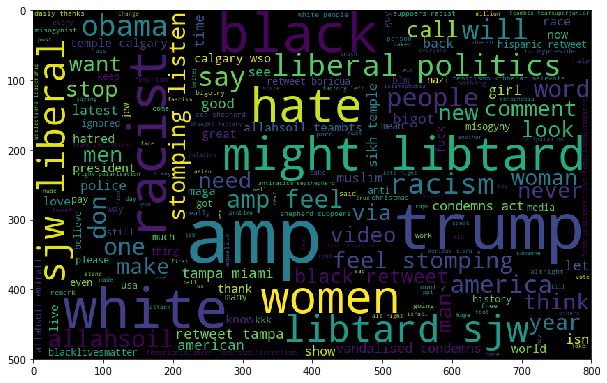

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_w)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.show()

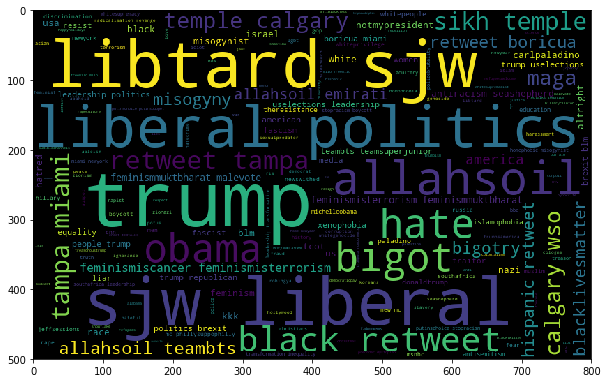

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_hash)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.show()

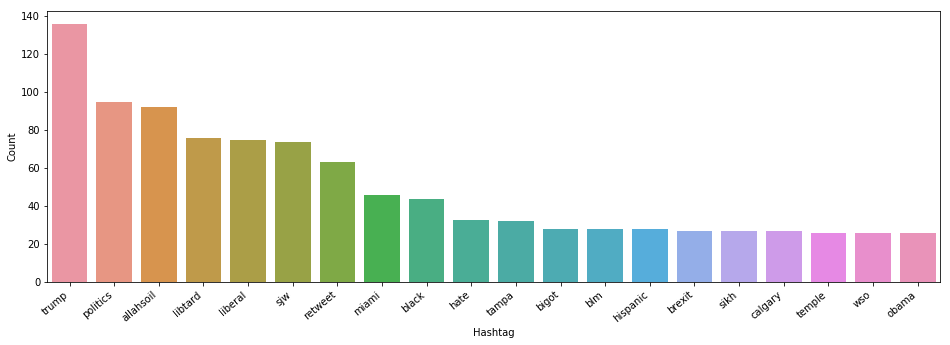

In [19]:
import nltk
import seaborn as sns
a = nltk.FreqDist(all_hash.split())
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)
# # selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set_xticklabels(d["Hashtag"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer #term frequrncy- inverse document frequency
import numpy as np
df = combDf[combDf["label"].isin([0,1])]
df["new_tweet"] += df["hash"] 
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=3000, stop_words='english')
bow = tfidf_vectorizer.fit_transform(df['new_tweet'])
bow.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(31962, 3000)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
X = bow
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

yp = model.predict(X_test)
cm = confusion_matrix(yp, y_test)
y_test[y_test==1].count()
cm

0.960588051298092


array([[2933,   93],
       [  33,  138]], dtype=int64)

In [28]:
threshold = 0.2
yp2_prob = model.predict_proba(X_test)
yp2 = (yp2_prob [:,1] >= threshold).astype('int')
cm = confusion_matrix(yp2, y_test)
y_test[y_test==1].count()
cm

array([[2813,   60],
       [ 153,  171]], dtype=int64)

In [24]:
s1 = "white and black are not same"
s1New = tfidf_vectorizer.transform([s1])
p = model.predict(s1New)
print(p)
model.predict_proba(s1New)

[0.]


array([[0.76, 0.24]])